In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.25.1'

In [3]:
import numpy as np

# 1. 데이터 프레임 만들기

## 사이킷런 데이터 가져오기

In [4]:
from sklearn import datasets

## 데이터 세트 정보 확인하기

In [5]:
data_iris = datasets.load_iris()

In [6]:
type(data_iris)

sklearn.utils.Bunch

## 내부 구조 확인하기

In [7]:
data_iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 데이터  읽어오기

In [8]:
a = data_iris['data']

In [9]:
type(a)

numpy.ndarray

## DataFrame 클래스로 객체 만들기

In [10]:
df_iris = pd.DataFrame(a, columns=data_iris['feature_names'])

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 열과 행의 레이블 확인하기

In [12]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [13]:
df_iris.index

RangeIndex(start=0, stop=150, step=1)

## 열의 레이블 변경하기

In [14]:
d = {'sepal length (cm)':'sepal_length', 'sepal width (cm)':'sepal_width', 'petal length (cm)': 'petal_length',  'petal width (cm)':'petal width'}

In [15]:
df_iris = df_iris.rename(columns=d)

In [16]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


# 2.  검색하기

## 하나의 열을  읽어오기

In [18]:
s = df_iris['sepal_length']

In [19]:
type(s)

pandas.core.series.Series

In [20]:
s.shape, s.ndim

((150,), 1)

## 열을 팬시 검색하기 :

In [21]:
df_iris[ ['sepal_length'  ] ].head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [22]:
ds = df_iris[ ['sepal_length' ,  'petal_length' ] ]

In [23]:
ds.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


## 슬라이스로 행을 읽어오기 

In [24]:
ss = df_iris[:5]

In [25]:
ss

,sepal_length,sepal_width,petal_length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 인덱서를 사용해서 검색하기

In [26]:
lloc = df_iris.loc[:5, ['sepal_length' ,  'petal_length' ] ]

In [27]:
lloc.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


## 인덱서에 열을 슬라이스 처리

In [28]:
lloc_s = df_iris.loc[:5, 'sepal_length' : 'petal_length' ]

In [29]:
lloc_s.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


# 3. 데이터 프레임 병합하기

## 타켓 값을 문자열로 변환하기

In [30]:
data_iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 타켓 이름 확인하기

In [31]:
data_iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 두 개의 데이터프레임을 병합하기

In [32]:
df_iris = pd.concat([df_iris, pd.DataFrame(data_iris['target'], columns=['target_names'])], axis=1)

In [33]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal width,target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 열의 자료형을 확인하고 문자열로 변환하기

In [34]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal width     float64
target_names      int64
dtype: object

In [35]:
df_iris['target_names'] = df_iris['target_names'].astype(str)

In [36]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal width     float64
target_names     object
dtype: object

### 타켓 이름의 내부 값을 변환하기 

In [37]:
for i, v in enumerate(data_iris['target_names']) :
    df_iris['target_names'] = df_iris['target_names'].replace(str(i), v)

In [38]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal width,target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal width,target_names
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 변환된 값 확인하기

In [40]:
df_iris['target_names'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: target_names, dtype: int64

# 4.  데이터 프레임  파일 처리하기

## 시본 데이터 가져오기

In [41]:
from seaborn import load_dataset

In [42]:
df_titanic = load_dataset('titanic')

In [43]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 그래프 확인하기

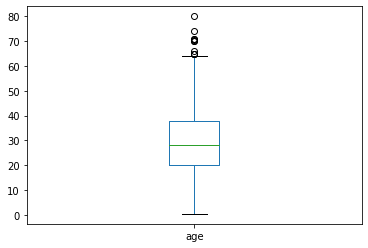

In [44]:
df_titanic['age'].plot(kind='box')

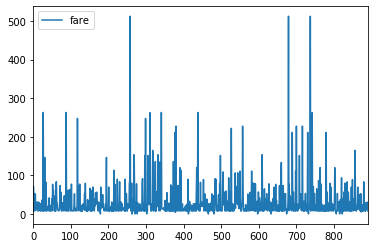

In [45]:
df_titanic[[ 'fare']].plot(kind='line')

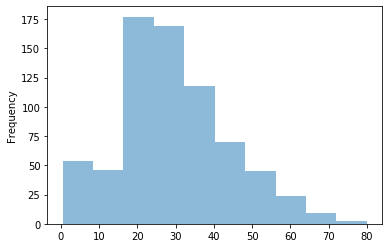

In [46]:
df_titanic['age'].plot.hist(alpha=0.5)

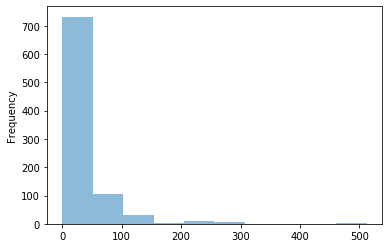

In [47]:
df_titanic['fare'].plot.hist(alpha=0.5)

##   성별과 생존자의 비율을 그래프로 확인하기

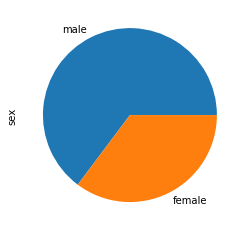

In [48]:
df_titanic['sex'].value_counts().plot.pie()

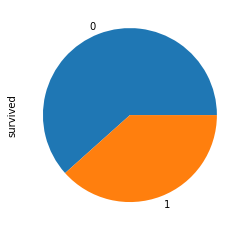

In [49]:
df_titanic['survived'].value_counts().plot.pie()

In [50]:
df_titanic.groupby(['sex','survived']).count().head()

pclass  age  sibsp  parch  fare  embarked  class  who  \
sex    survived                                                          
female 0             81   64     81     81    81        81     81   81   
       1            233  197    233    233   233       231    233  233   
male   0            468  360    468    468   468       468    468  468   
       1            109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
sex    survived                                               
female 0                 81     6           81     81     81  
       1                233    91          231    233    233  
male   0                468    61          468    468    468  
       1                109    45          109    109    109

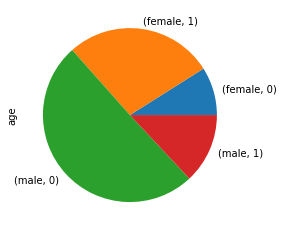

In [51]:
df_titanic.groupby(['sex','survived']).count()['age'].plot.pie()

## csv 파일 만들기

In [52]:
df_titanic.to_csv("titanic.csv")

In [53]:
%ls

README.md                            넘파이 모듈 알아보기.ipynb
titanic.csv                          판다스 모듈 알아보기.ipynb


## csv 파일 읽기

In [54]:
df_ = pd.read_csv('titanic.csv')

In [55]:
df_.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 필요없는 열 삭제

In [56]:
df_ = df_.drop("Unnamed: 0", axis=1)

## 데이터 상태 확인하기

In [57]:
df_.shape

(891, 15)

## 데이터, 열, 행의 정보 확인하기

In [58]:
df_.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

In [59]:
df_.index

RangeIndex(start=0, stop=891, step=1)

In [60]:
df_.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## 데이터의 자료형 알아보기

In [61]:
df_.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [62]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# 5.  결측값 처리하기

## 결측값을 가진 열 확인

In [63]:
df_.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
df_['age'].dtype

dtype('float64')

In [65]:
df_['deck'].dtype

dtype('O')

In [66]:
df_['embarked'].dtype

dtype('O')

In [67]:
df_['embark_town'].dtype

dtype('O')

## 결측값을 가진 행 초기화

In [68]:
df_['age']  = df_['age'].fillna(0)

In [69]:
df_['deck'] = df_['deck'].fillna('')

In [70]:
df_.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

## 결측값을 가진 행 삭제

In [71]:
df__ = df_.dropna()

In [72]:
df_.shape

(891, 15)

In [73]:
df__.shape

(889, 15)

In [74]:
df__.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,,Southampton,no,True


# 6.  통계값 처리하기

## 숫자 자료형 처리

In [75]:
df__.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681
std,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df__.select_dtypes(include='number').head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [77]:
df__.select_dtypes(include='number').describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681
std,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 문자 자료형 처리

In [78]:
df__.select_dtypes(include='object')

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,,Southampton,no
...,...,...,...,...,...,...,...
886,male,S,Second,man,,Southampton,no
887,female,S,First,woman,B,Southampton,yes
888,female,S,Third,woman,,Southampton,no
889,male,C,First,man,C,Cherbourg,yes


In [79]:
df__.select_dtypes(include='object').describe()

,sex,embarked,class,who,deck,embark_town,alive
count,889,889,889,889,889,889,889
unique,2,3,3,3,8,3,2
top,male,S,Third,man,,Southampton,no
freq,577,644,491,537,688,644,549


# 7.  피봇 데이블과 그룹 처리  

## 피봇 테이블 만들기

In [80]:
pvt = pd.pivot_table(df__, values='fare', index=['sex'],columns=['class'], aggfunc=np.sum)

In [81]:
pvt

class,First,Second,Third
sex,,,
female,9815.8250,1669.7292,2321.1086
male,8201.5875,2132.1125,4393.5865


## 그룹화 처리

In [82]:
df_g = df__.groupby(['sex','class']).agg({'fare':sum}).unstack()

In [83]:
df_g.columns

MultiIndex([('fare',  'First'),
            ('fare', 'Second'),
            ('fare',  'Third')],
           names=[None, 'class'])

In [84]:
df_g.columns = pvt.columns

In [85]:
df_g

class,First,Second,Third
sex,,,
female,9815.8250,1669.7292,2321.1086
male,8201.5875,2132.1125,4393.5865
